In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [8]:
df = pd.read_csv("police.csv")

In [3]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160


In [19]:
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215024 entries, 0 to 2215023
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          datetime64[ns]
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 219.7+ MB


In [21]:
df["Date"].max()

Timestamp('2018-05-15 00:00:00')

In [22]:
start_date = df["Date"].max() - dt.timedelta(weeks=11*52)

In [38]:
cleaned = df[df["Date"] >= start_date]

In [88]:
cleaned["Year"] = cleaned["Date"].dt.year

In [132]:
cleaned = cleaned.drop(columns=["Descript", "Date", "Resolution"])

In [138]:
cleaned.head()

,Category,PdDistrict,Year
0,NON-CRIMINAL,MISSION,2015
1,ROBBERY,TENDERLOIN,2015
2,ASSAULT,TENDERLOIN,2015
3,SECONDARY CODES,TENDERLOIN,2015
4,VANDALISM,NORTHERN,2015


In [176]:
cleaned = cleaned.rename(columns={"Category": "Incidents", "PdDistrict": "Neighborhood"})
cleaned.head()

,Incidents,Neighborhood,Year
0,NON-CRIMINAL,MISSION,2015
1,ROBBERY,TENDERLOIN,2015
2,ASSAULT,TENDERLOIN,2015
3,SECONDARY CODES,TENDERLOIN,2015
4,VANDALISM,NORTHERN,2015


In [177]:
# cleaned.loc["BAYVIEW", "NORTHERN", "MISSION"]]

bayview = cleaned.loc[cleaned['Neighborhood'] == 'BAYVIEW']
mission = cleaned.loc[cleaned['Neighborhood'] == 'MISSION']
northern = cleaned.loc[cleaned['Neighborhood'] == 'NORTHERN']

In [178]:
merge = bayview.merge(mission, how = 'outer')
final = merge.merge(northern, how = 'outer')
final

,Incidents,Neighborhood,Year
0,SECONDARY CODES,BAYVIEW,2015
1,SECONDARY CODES,BAYVIEW,2015
2,SECONDARY CODES,BAYVIEW,2015
3,SECONDARY CODES,BAYVIEW,2015
4,SECONDARY CODES,BAYVIEW,2015
5,SECONDARY CODES,BAYVIEW,2015
6,SECONDARY CODES,BAYVIEW,2015
7,SECONDARY CODES,BAYVIEW,2015
8,SECONDARY CODES,BAYVIEW,2015
9,SECONDARY CODES,BAYVIEW,2015


In [180]:
tbp = final.groupby(['Neighborhood', 'Year']).count()
tbp = tbp.reset_index()

In [182]:
omega = tbp.pivot(index = 'Year', columns = 'Neighborhood', values = 'Incidents')

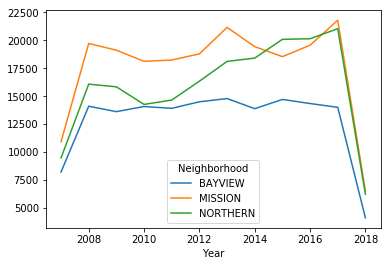

In [183]:
omega.plot()